# Storage

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
from datetime import datetime
from pytz import timezone

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Load files

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

In [24]:
fname = "storage_capacity.csv"
storage_capacity = get_data_sftp(hostname, username, scenario_name, fname)
storage_capacity = storage_capacity[storage_capacity['period']==2050]
storage_capacity

,generation_project,period,load_zone,OnlinePowerCapacityMW,OnlineEnergyCapacityMWh,scenario
67,1191209720,2050,AZ_APS_E,0.00,0.00,s1
71,1191209721,2050,AZ_APS_N,0.00,0.00,s1
75,1191209722,2050,AZ_APS_SW,0.00,0.00,s1
79,1191209723,2050,AZ_NM_N,0.00,0.00,s1
83,1191209724,2050,AZ_NW,"1,612.30","9,480.20",s1
...,...,...,...,...,...,...
247,1191209765,2050,WA_W,0.00,0.00,s25
251,1191209766,2050,WY_NE,0.00,0.00,s25
255,1191209767,2050,WY_NW,0.00,0.00,s25
259,1191209768,2050,WY_SE,309.96,"1,215.00",s25


In [25]:
storage_capacity.insert(5,"Storage_duration_h",storage_capacity["OnlineEnergyCapacityMWh"]/storage_capacity["OnlinePowerCapacityMW"])
storage_capacity['Storage_duration_h']=storage_capacity['Storage_duration_h'].fillna(0)
storage_capacity.insert(4,"OnlineEnergyCapacityGWh",storage_capacity['OnlineEnergyCapacityMWh']/1000)

#storage_capacity=storage_capacity[storage_capacity.Storage_duration_h != 0]
storage_capacity = storage_capacity[storage_capacity['period']==2050]
storage_capacity

,generation_project,period,load_zone,OnlinePowerCapacityMW,OnlineEnergyCapacityGWh,OnlineEnergyCapacityMWh,Storage_duration_h,scenario
67,1191209720,2050,AZ_APS_E,0.00,0.00,0.00,0.00,s1
71,1191209721,2050,AZ_APS_N,0.00,0.00,0.00,0.00,s1
75,1191209722,2050,AZ_APS_SW,0.00,0.00,0.00,0.00,s1
79,1191209723,2050,AZ_NM_N,0.00,0.00,0.00,0.00,s1
83,1191209724,2050,AZ_NW,"1,612.30",9.48,"9,480.20",5.88,s1
...,...,...,...,...,...,...,...,...
247,1191209765,2050,WA_W,0.00,0.00,0.00,0.00,s25
251,1191209766,2050,WY_NE,0.00,0.00,0.00,0.00,s25
255,1191209767,2050,WY_NW,0.00,0.00,0.00,0.00,s25
259,1191209768,2050,WY_SE,309.96,1.22,"1,215.00",3.92,s25


### Analysis in WECC

In [26]:
duration_wecc=storage_capacity.pivot_table(
    index="load_zone", columns="scenario", values="Storage_duration_h", aggfunc=np.sum
)

duration_wecc = duration_wecc.reindex(columns=scenario_name)

<ipython-input-27-7e89a2779e25>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  duration_wecc.describe().T.to_latex(folder_to_save_results+"Storage duration in WECC.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,50.00,3.57,2.96,0.00,0.00,5.88,5.88,7.84
s2,50.00,3.57,2.96,0.00,0.00,5.88,5.88,7.84
s3,50.00,3.56,2.94,0.00,0.00,5.88,5.88,7.40
s4,50.00,3.29,2.95,0.00,0.00,5.88,5.88,5.88
s5,50.00,3.16,2.95,0.00,0.00,5.88,5.88,5.88
s6,50.00,3.45,2.98,0.00,0.00,5.88,5.88,7.84
s7,50.00,3.45,2.98,0.00,0.00,5.88,5.88,7.84
s8,50.00,3.67,2.91,0.00,0.00,5.88,5.88,7.16
s9,50.00,3.41,2.93,0.00,0.00,5.88,5.88,5.88


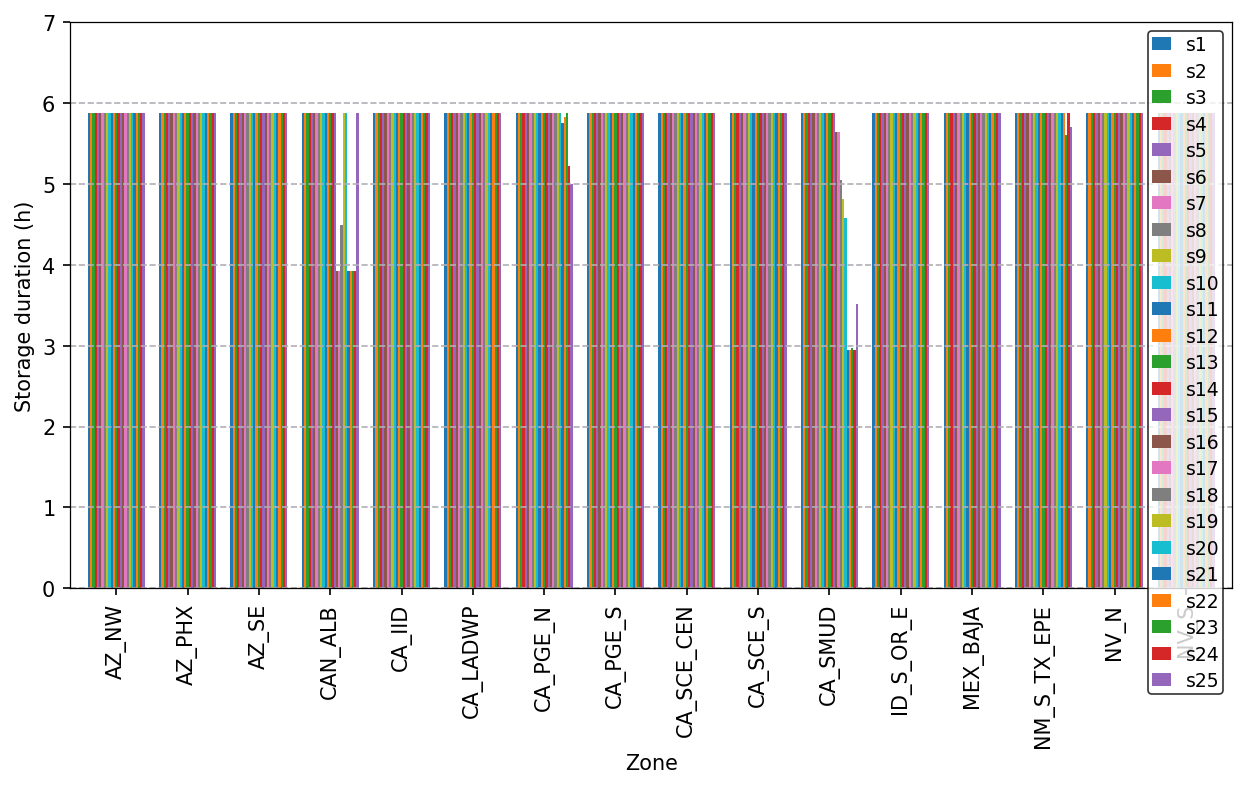

In [27]:
fig = plt.figure(figsize=(10,  5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (duration_wecc[duration_wecc != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.xlabel("Zone")
plt.ylabel("Storage duration (h)")

ax.grid(axis='y', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Storage duration in WECC.png", transparent=False)


duration_wecc.describe().T.to_latex(folder_to_save_results+"Storage duration in WECC.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage duration (h) in WECC")

duration_wecc.describe().T


In [28]:
storagecap_wecc=storage_capacity.pivot_table(
    index="load_zone", columns="scenario", values="OnlineEnergyCapacityGWh", aggfunc=np.sum
)
storagecap_wecc = storagecap_wecc.reindex(columns=scenario_name)

<ipython-input-29-bcc0fd4cb1ad>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  storagecap_wecc.describe().T.to_latex(folder_to_save_results+"Storage Capacity in WECC.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,50.00,19.48,36.04,0.00,0.00,4.33,26.48,169.88
s2,50.00,19.29,35.73,0.00,0.00,4.11,24.62,167.55
s3,50.00,18.95,35.69,0.00,0.00,3.11,21.60,170.60
s4,50.00,18.05,35.52,0.00,0.00,3.75,21.18,171.00
s5,50.00,17.87,35.24,0.00,0.00,3.28,22.67,170.46
s6,50.00,19.37,36.04,0.00,0.00,4.34,25.50,168.93
s7,50.00,19.22,35.91,0.00,0.00,4.26,24.18,169.56
s8,50.00,18.86,35.71,0.00,0.00,2.86,22.72,171.47
s9,50.00,18.01,35.24,0.00,0.00,3.34,21.70,170.66


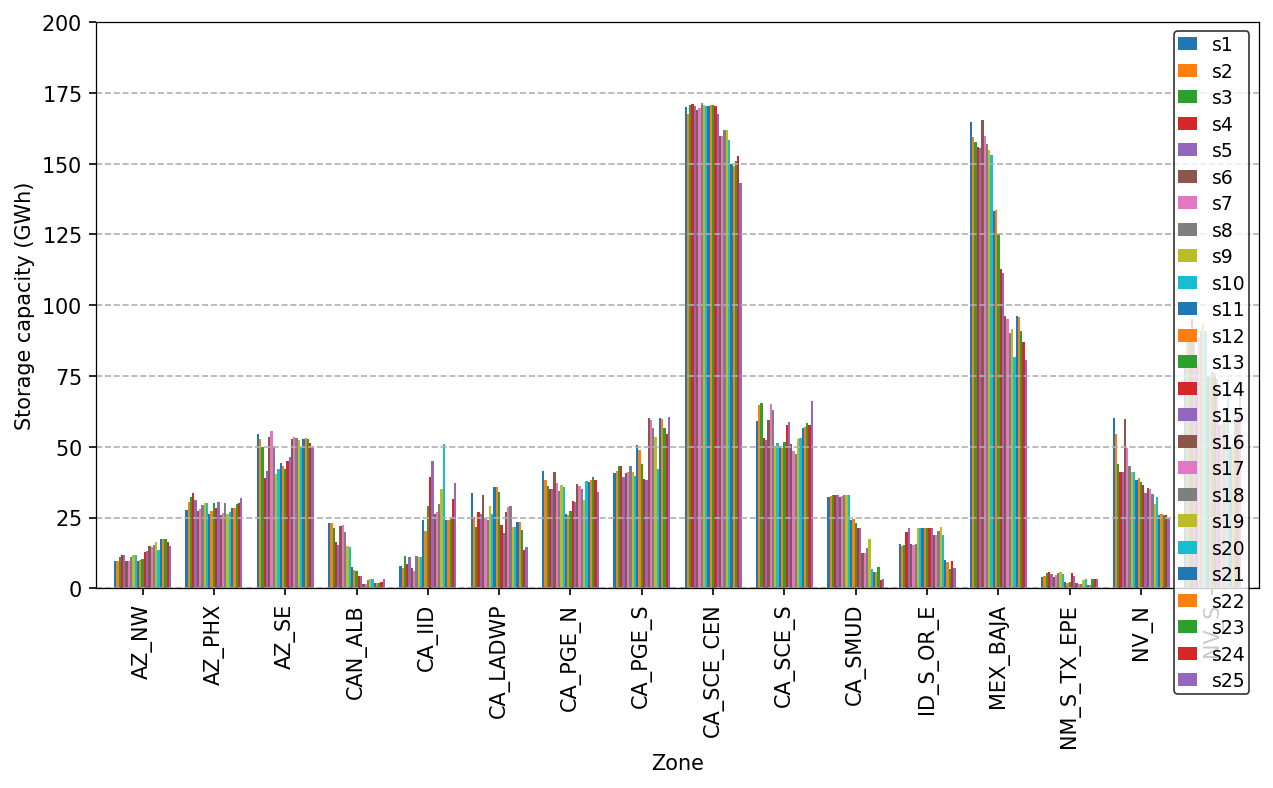

In [29]:
fig = plt.figure(figsize=(10,  5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (storagecap_wecc[storagecap_wecc != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.xlabel("Zone")
plt.ylabel("Storage capacity (GWh)")

ax.grid(axis='y', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')


plt.savefig(folder_to_save_results+"Storage capacity in WECC.png", transparent=False)

storagecap_wecc.describe().T.to_latex(folder_to_save_results+"Storage Capacity in WECC.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage capacity (GWh) in WECC")

storagecap_wecc.describe().T


### Analysis in California

In [30]:
#Filter to California
storage_capacity_ca=storage_capacity[storage_capacity.load_zone.str.startswith('CA_')]

In [31]:
duration_ca=storage_capacity_ca.pivot_table(
    index="load_zone", columns="scenario", values="Storage_duration_h", aggfunc=np.sum
)
duration_ca= duration_ca.reindex(columns=scenario_name)

<ipython-input-32-17d7658c4c1c>:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  duration_ca.describe().T.to_latex(folder_to_save_results+"Storage duration in California.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s2,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s3,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s4,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s5,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s6,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s7,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s8,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88
s9,12.00,5.39,1.70,0.00,5.88,5.88,5.88,5.88


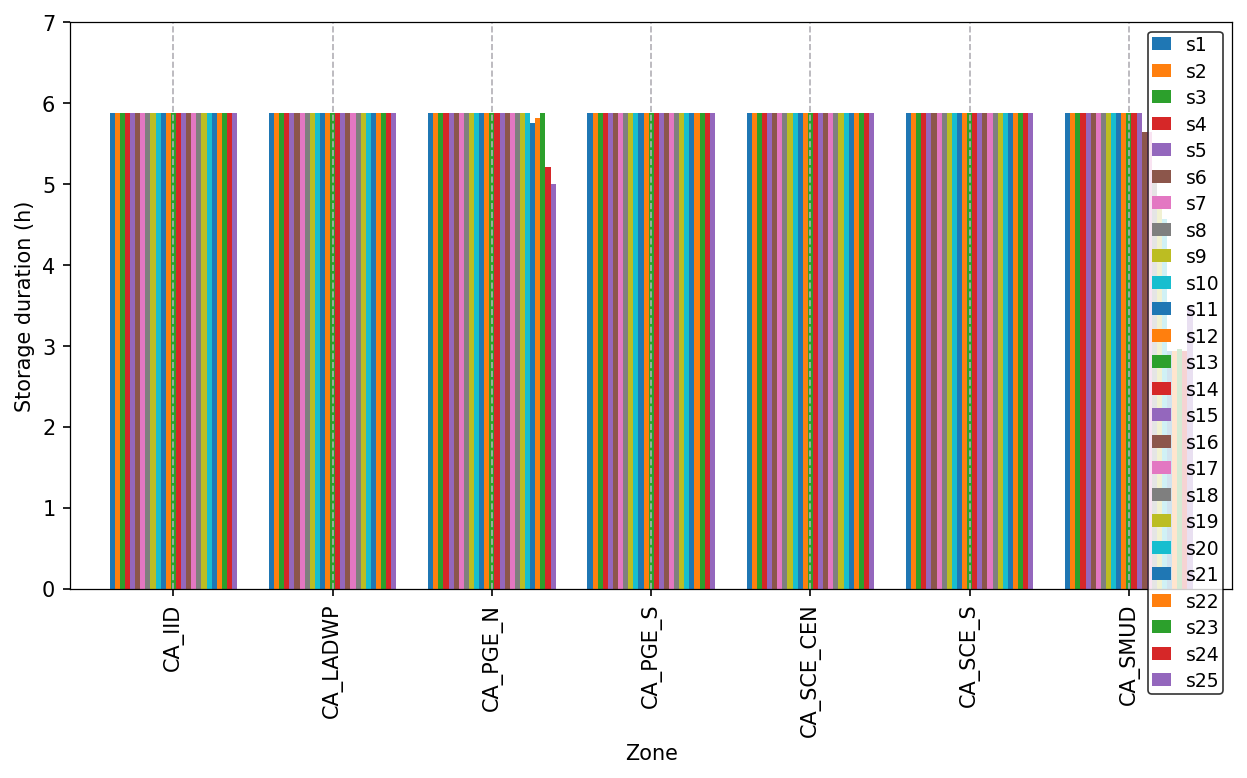

In [32]:
fig = plt.figure(figsize=(10, 5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (duration_ca[duration_ca != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.ylabel("Storage duration (h)")
plt.xlabel("Zone")


ax.grid(axis='x', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Storage duration in California.png", transparent=False)


duration_ca.describe().T.to_latex(folder_to_save_results+"Storage duration in California.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage duration (h) in California")

duration_ca.describe().T

In [33]:
storagecap_ca=storage_capacity_ca.pivot_table(
    index="load_zone", columns="scenario", values="OnlineEnergyCapacityGWh", aggfunc=np.sum
)
storagecap_ca= storagecap_ca.reindex(columns=scenario_name)

<ipython-input-34-ec957b7c4a77>:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  storagecap_ca.describe().T.to_latex(folder_to_save_results+"Storage capacity (GWh) in California.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,12.00,38.21,45.17,0.00,7.77,32.84,41.00,169.88
s2,12.00,37.75,45.05,0.00,7.20,29.09,39.91,167.55
s3,12.00,37.42,46.25,0.00,10.26,27.27,42.39,170.60
s4,12.00,35.51,46.46,0.00,6.68,29.86,42.31,171.00
s5,12.00,35.44,46.00,0.00,6.78,29.58,40.14,170.46
s6,12.00,38.04,44.99,0.00,7.25,32.55,40.83,168.93
s7,12.00,37.83,45.66,0.00,6.89,29.49,40.06,169.56
s8,12.00,37.26,46.30,0.00,10.43,28.45,42.39,171.47
s9,12.00,35.74,45.97,0.00,6.81,30.95,41.36,170.66


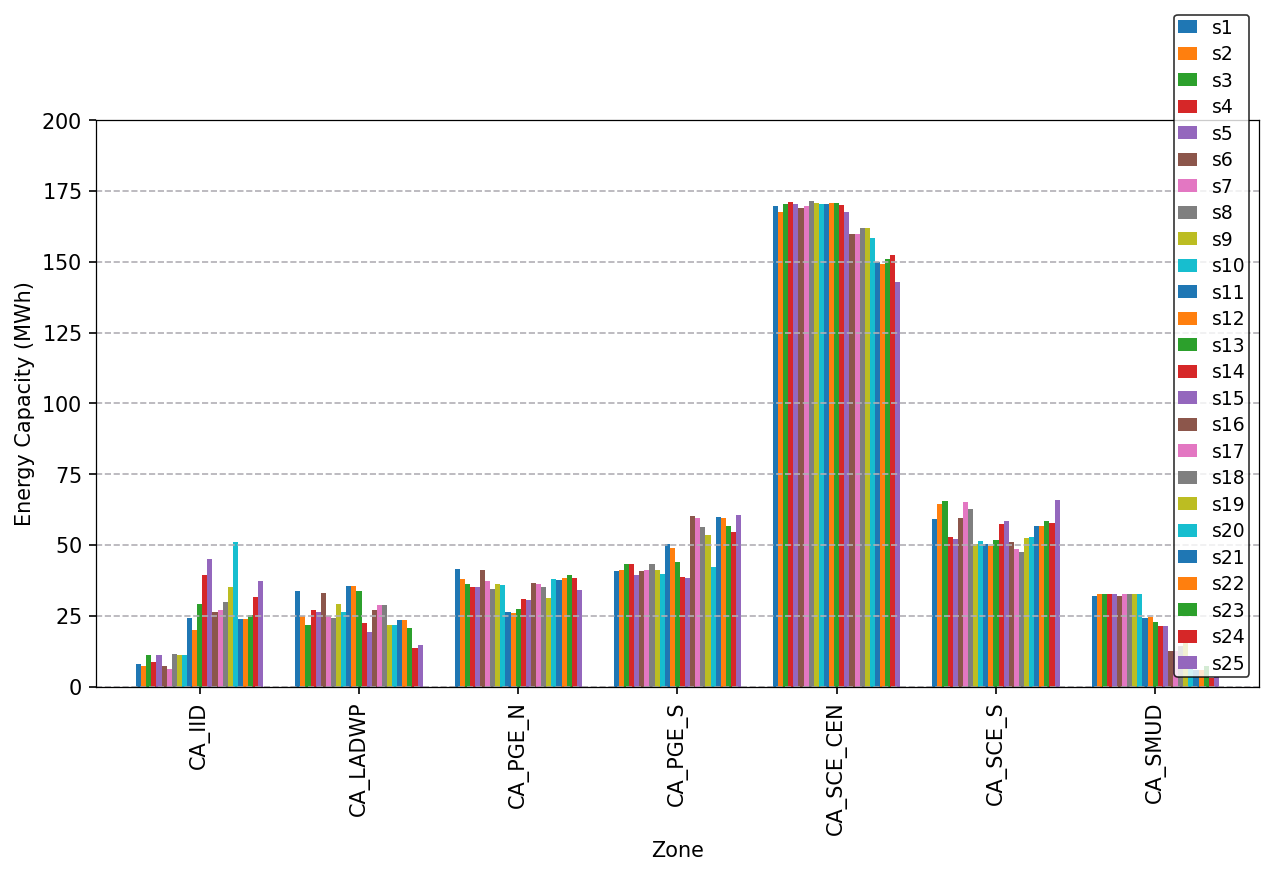

In [34]:
fig = plt.figure(figsize=(10, 5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (storagecap_ca[storagecap_ca != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.ylabel("Energy Capacity (MWh)")
plt.xlabel("Zone")


ax.grid(axis='y', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Storage capacity in California.png", transparent=False)


storagecap_ca.describe().T.to_latex(folder_to_save_results+"Storage capacity (GWh) in California.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage capacity (GWh) in California")

storagecap_ca.describe().T

### Analysis out of California

In [35]:
zones_ca=storage_capacity[storage_capacity["scenario"].isin(["base"])]
zones_ca=list(zones_ca[zones_ca.load_zone.str.startswith('CA_')].load_zone)
storage_capacity_outca=storage_capacity[~storage_capacity["load_zone"].isin(zones_ca)]
storage_capacity_outca

,generation_project,period,load_zone,OnlinePowerCapacityMW,OnlineEnergyCapacityGWh,OnlineEnergyCapacityMWh,Storage_duration_h,scenario
67,1191209720,2050,AZ_APS_E,0.00,0.00,0.00,0.00,s1
71,1191209721,2050,AZ_APS_N,0.00,0.00,0.00,0.00,s1
75,1191209722,2050,AZ_APS_SW,0.00,0.00,0.00,0.00,s1
79,1191209723,2050,AZ_NM_N,0.00,0.00,0.00,0.00,s1
83,1191209724,2050,AZ_NW,"1,612.30",9.48,"9,480.20",5.88,s1
...,...,...,...,...,...,...,...,...
247,1191209765,2050,WA_W,0.00,0.00,0.00,0.00,s25
251,1191209766,2050,WY_NE,0.00,0.00,0.00,0.00,s25
255,1191209767,2050,WY_NW,0.00,0.00,0.00,0.00,s25
259,1191209768,2050,WY_SE,309.96,1.22,"1,215.00",3.92,s25


In [36]:
duration_outca=storage_capacity_outca.pivot_table(
    index="load_zone", columns="scenario", values="Storage_duration_h", aggfunc=np.sum
)
duration_outca= duration_outca.reindex(columns=scenario_name)

<ipython-input-37-6041f2769d1d>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  duration_outca.describe().T.to_latex(folder_to_save_results+"Storage duration out of California.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,50.00,3.57,2.96,0.00,0.00,5.88,5.88,7.84
s2,50.00,3.57,2.96,0.00,0.00,5.88,5.88,7.84
s3,50.00,3.56,2.94,0.00,0.00,5.88,5.88,7.40
s4,50.00,3.29,2.95,0.00,0.00,5.88,5.88,5.88
s5,50.00,3.16,2.95,0.00,0.00,5.88,5.88,5.88
s6,50.00,3.45,2.98,0.00,0.00,5.88,5.88,7.84
s7,50.00,3.45,2.98,0.00,0.00,5.88,5.88,7.84
s8,50.00,3.67,2.91,0.00,0.00,5.88,5.88,7.16
s9,50.00,3.41,2.93,0.00,0.00,5.88,5.88,5.88


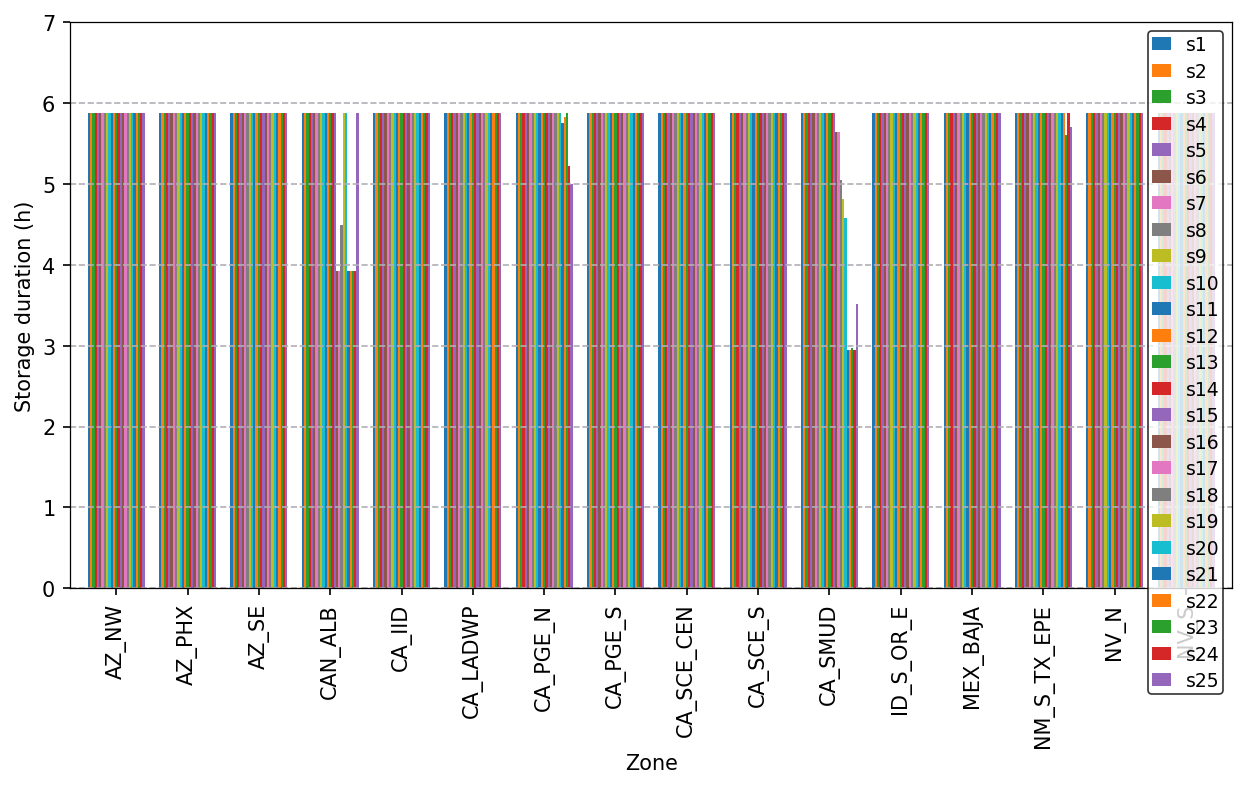

In [37]:
fig = plt.figure(figsize=(10, 5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (duration_outca[duration_outca != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.ylabel("Storage duration (h)")
plt.xlabel("Zone")

ax.grid(axis='y', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Storage duration out of California.png", transparent=False)


duration_outca.describe().T.to_latex(folder_to_save_results+"Storage duration out of California.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage duration (h) out of California")

duration_outca.describe().T

In [38]:
storagecap_outca=storage_capacity_outca.pivot_table(
    index="load_zone", columns="scenario", values="OnlineEnergyCapacityGWh", aggfunc=np.sum
)
storagecap_outca= storagecap_outca.reindex(columns=scenario_name)

<ipython-input-39-b748a11ec92c>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  storagecap_outca.describe().T.to_latex(folder_to_save_results+"Storage capacity out of California.tex",index=True,


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
s1,50.00,19.48,36.04,0.00,0.00,4.33,26.48,169.88
s2,50.00,19.29,35.73,0.00,0.00,4.11,24.62,167.55
s3,50.00,18.95,35.69,0.00,0.00,3.11,21.60,170.60
s4,50.00,18.05,35.52,0.00,0.00,3.75,21.18,171.00
s5,50.00,17.87,35.24,0.00,0.00,3.28,22.67,170.46
s6,50.00,19.37,36.04,0.00,0.00,4.34,25.50,168.93
s7,50.00,19.22,35.91,0.00,0.00,4.26,24.18,169.56
s8,50.00,18.86,35.71,0.00,0.00,2.86,22.72,171.47
s9,50.00,18.01,35.24,0.00,0.00,3.34,21.70,170.66


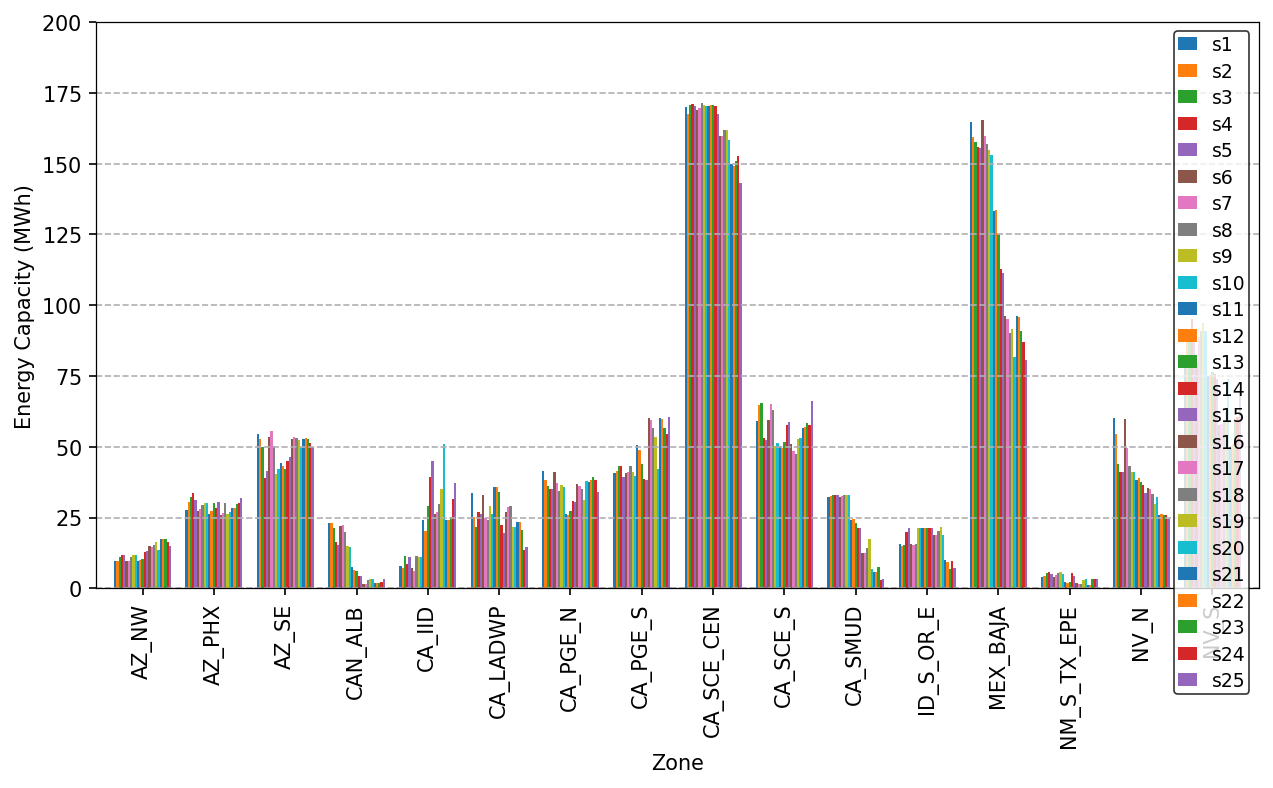

In [39]:
fig = plt.figure(figsize=(10, 5), dpi=150)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (storagecap_outca[storagecap_outca != 0]).dropna()

# Main figure
data.plot.bar(ax=ax, lw=0, width=0.8)
plt.ylabel("Energy Capacity (MWh)")
plt.xlabel("Zone")

ax.grid(axis='y', linestyle='dashed')

ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="best",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Storage capacity out of California.png", transparent=False)


storagecap_outca.describe().T.to_latex(folder_to_save_results+"Storage capacity out of California.tex",index=True,
                                  float_format='%.2f', columns=["mean", "std", "25%", "50%","75%", "max"],
                                  caption="Statistics of storage capacity (GWh) out of California")

storagecap_outca.describe().T